<a href="https://colab.research.google.com/github/rajveer0104/DSA-with-Java/blob/main/main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/dataset.csv')

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.drop(columns="Marital status",inplace=True)
df.drop(columns="Application order",inplace=True)
df.drop(columns="Nacionality",inplace=True)
df.drop(columns="GDP",inplace=True)
df.drop(columns="Inflation rate",inplace=True)
df.drop(columns="Unemployment rate",inplace=True)
df.drop(columns='Educational special needs',inplace=True)

In [ ]:
df.shape

(4424, 28)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Target']=le.fit_transform(df['Target'])

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Application mode                                4424 non-null   int64  
 1   Course                                          4424 non-null   int64  
 2   Daytime/evening attendance                      4424 non-null   int64  
 3   Previous qualification                          4424 non-null   int64  
 4   Mother's qualification                          4424 non-null   int64  
 5   Father's qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

In [ ]:
import seaborn as sns
correlation_matrix = df.corr()
import matplotlib.pyplot as plt

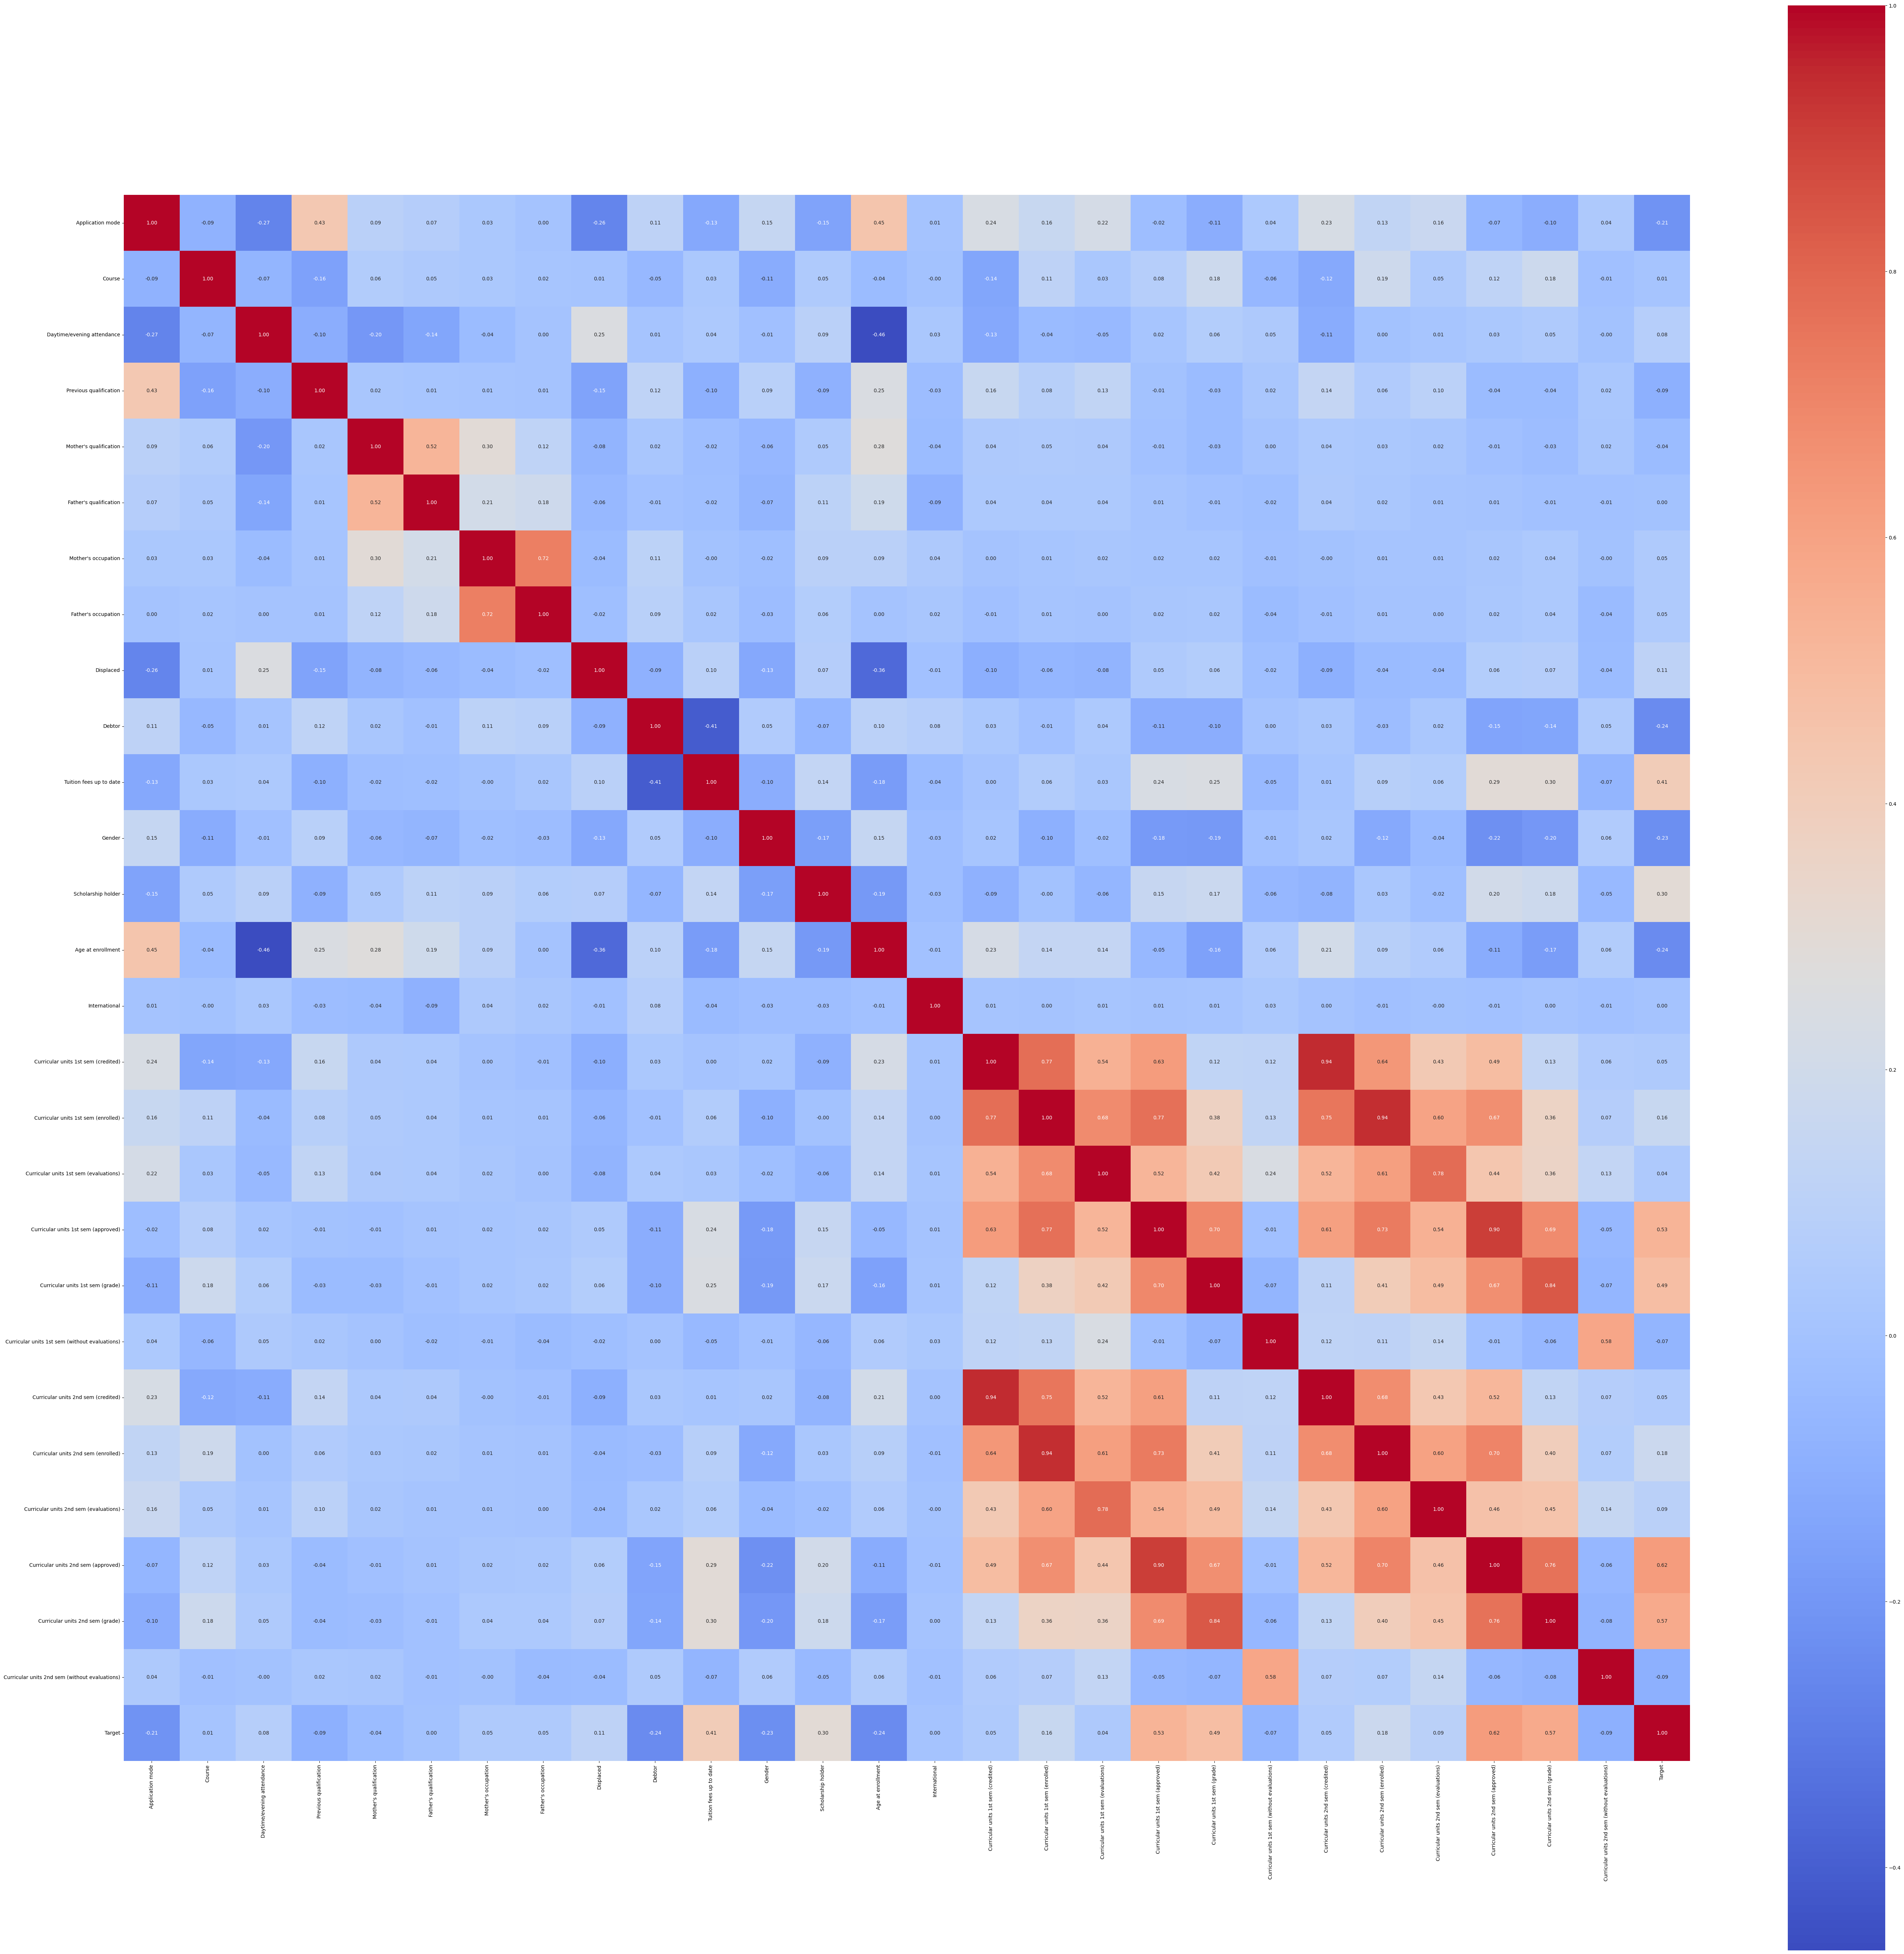

In [ ]:
plt.figure(figsize=(70,70))  # adjust width & height
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap="coolwarm")
plt.show()


no


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X=df.drop(columns="Target")
Y=df["Target"]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
model =LogisticRegression(max_iter=1000000)

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000000)

In [ ]:
acc=accuracy_score(Y_test,model.predict(X_test))
acc

0.7762711864406779

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(criterion='gini')

In [ ]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
acc2=accuracy_score(Y_test,model1.predict(X_test))
acc2

0.6949152542372882

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()

In [ ]:
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
acc3=accuracy_score(Y_test,model3.predict(X_test))
print(acc3)
acc_t=accuracy_score(Y_train,model3.predict(X_train))
print(acc_t)

0.7864406779661017
1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()

In [ ]:
model4.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
acc4=accuracy_score(Y_test,model4.predict(X_test))
acc4

0.6689265536723163

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model5=MultinomialNB()
model5.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
acc5=accuracy_score(Y_test,model5.predict(X_test))
acc5

0.6644067796610169

In [ ]:
from sklearn.svm import SVC
model6=SVC()
model6.fit(X_train,Y_train)
acc6=accuracy_score(Y_test,model6.predict(X_test))
acc6

0.7457627118644068

# Hence proven that Random forest classifier is best that is model 3 so we need to import that model


In [ ]:
import pickle
with open('model3.pkl','wb') as f:
  pickle.dump(model3,f)

In [ ]:
with open ('model3.pkl','rb') as f:
  mp=pickle.load(f)

In [ ]:
#confusion
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pred=model3.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,pred)

In [ ]:
cm

array([[222,  17,  45],
       [ 41,  63,  55],
       [ 10,  21, 411]])

Text(50.722222222222214, 0.5, 'Truth')

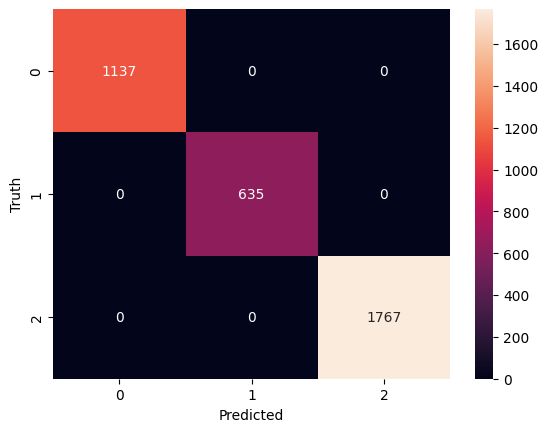

In [ ]:
cm2=confusion_matrix(Y_train,model3.predict(X_train))
sns.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(50.722222222222214, 0.5, 'Truth')

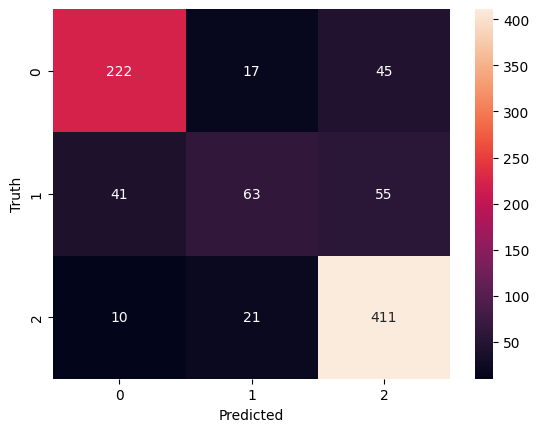

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
Y_test.value_counts()

,count
Target,
2,442
0,284
1,159


In [ ]:
df.columns

Index(['Application mode', 'Course', 'Daytime/evening attendance',
       'Previous qualification', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target'],
      dtype='object')

Here is the dataset

https://github.com/carmelh/SQL_projects/tree/main/student_data_analysis/Datasets

Just verify this columns

['Application mode', 'Course', 'Daytime/evening attendance',
       'Previous qualification', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']

In [ ]:
df['Curricular units 1st sem (approved)'].value_counts()

,count
Curricular units 1st sem (approved),
6,1171
5,723
0,718
7,471
4,433
3,269
2,160
1,127
8,108
